In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score
from sklearn.model_selection import GridSearchCV

In [7]:
import os
os.chdir("../")

In [10]:
os.getcwd()

'c:\\TheBritishCollege\\DataScience'

In [25]:
os.chdir(r"c:\TheBritishCollege\DataScience\CreditCard_fault_detection")

In [26]:
os.getcwd()

'c:\\TheBritishCollege\\DataScience\\CreditCard_fault_detection'

In [27]:
data=pd.read_csv("artifacts\data_ingestion\credit_card_fraud.csv")

In [28]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [30]:
data[['default payment next month']].value_counts()

default payment next month
0                             787
1                             214
Name: count, dtype: int64

In [31]:
data.rename(columns={'default payment next month':'Target_credit'}, inplace=True)

In [32]:
data['Target_credit'].value_counts()

Target_credit
0    787
1    214
Name: count, dtype: int64

<Axes: >

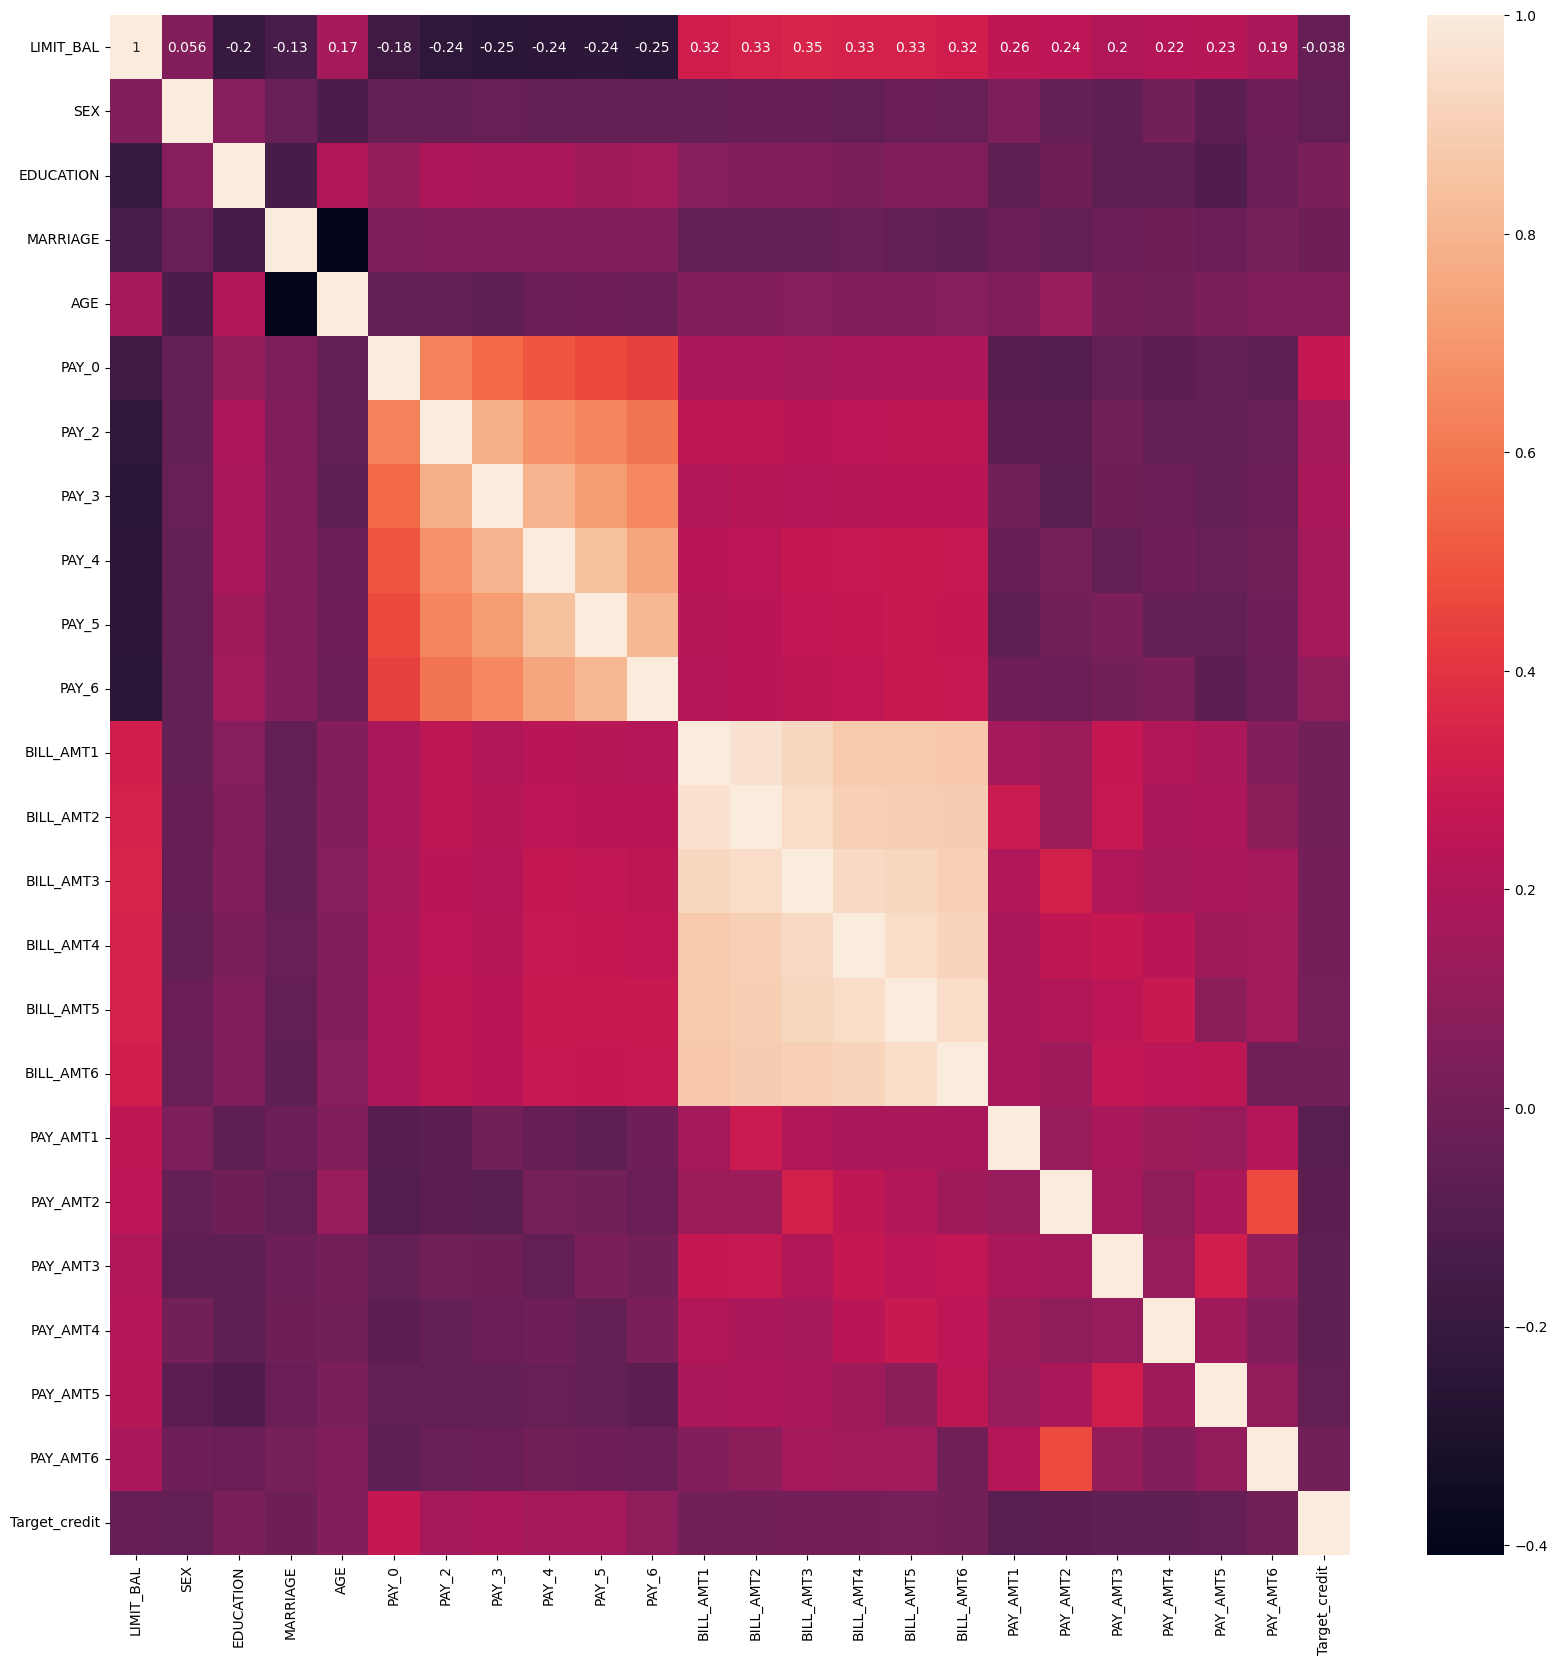

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

In [34]:
# column to drop
# sex, education, marriage, age,

In [35]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Target_credit'],
      dtype='object')

In [36]:
drop_column=['SEX','EDUCATION','MARRIAGE','AGE']

In [37]:
data.drop(drop_column,axis=1, inplace=True)

In [38]:
data.columns

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'Target_credit'],
      dtype='object')

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>],
       [<Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>,
        <Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>],
       [<Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>,
        <Axes: title={'center': 'Target_credit'}>]], dtype=object)

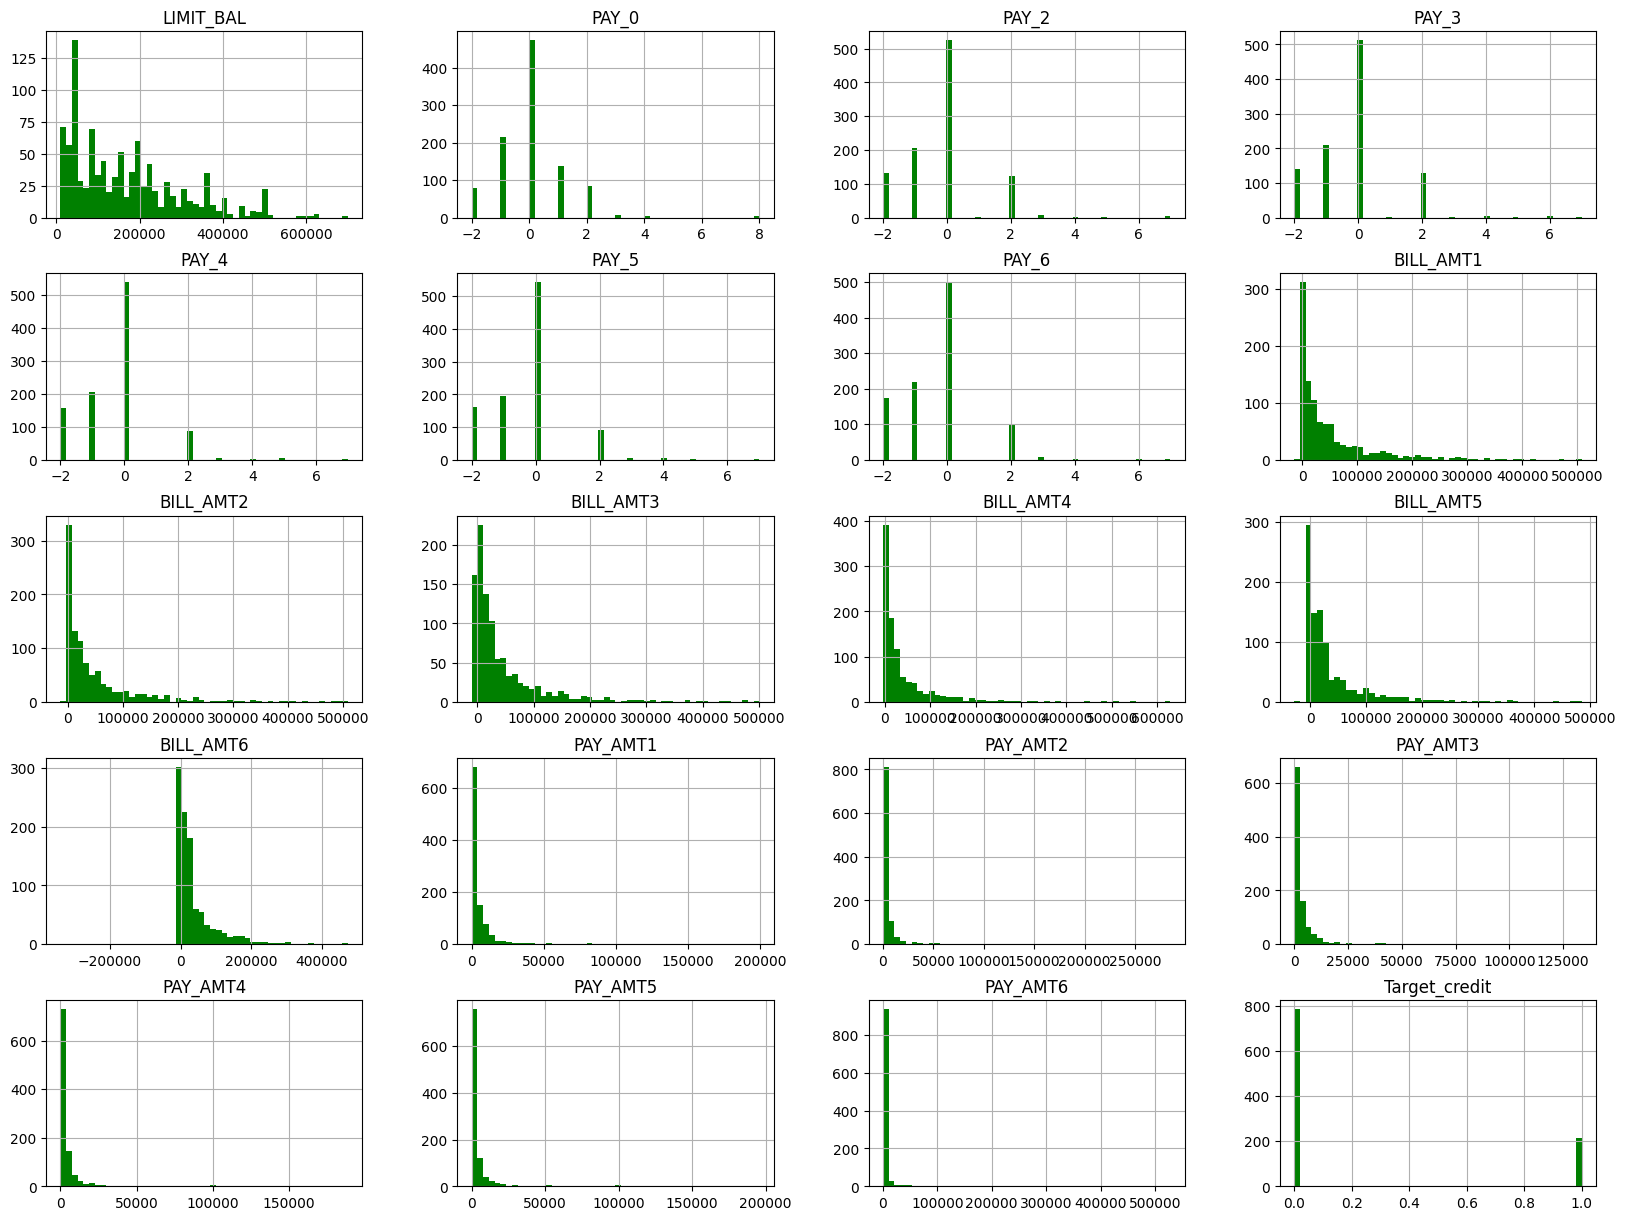

In [39]:
data.hist(bins=50, figsize=(20,15), color='green')

In [40]:
x=data.iloc[:,:-1]

In [41]:
y=data.iloc[:,[-1]]

In [42]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

In [43]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750, 19), (251, 19), (750, 1), (251, 1))

In [44]:
std_scaled=StandardScaler()

In [45]:
x_train_scaled=std_scaled.fit_transform(x_train)
x_test_scaled=std_scaled.transform(x_test)

In [46]:
x_train_scaled[0]

array([ 0.23806291, -0.02017288,  0.13059113,  0.12595668,  0.23182058,
        0.23479566,  0.2519547 ,  0.41342279,  0.41179353,  0.3473212 ,
        0.43634653,  0.49264211,  0.51967008, -0.17966265, -0.12058117,
       -0.15748707, -0.1479792 , -0.15812658, -0.08546504])

In [47]:
Model={
    'Random_Forest': RandomForestClassifier(),
    'Decision_Tree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB()
    }

In [48]:
def Model_trainer_evaluation(x_train, x_test,y_train, y_test,Model):
  report_error={}
  acc_score={}
  y_train=np.array(y_train)
  y_test=np.array(y_test)
  for i in range(len(Model)):

    model=list(Model.values())[i]
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)

    mse=mean_squared_error(y_test, y_pred)
    acc=accuracy_score(y_test, y_pred)

    report_error[list(Model.keys())[i]]=mse
    acc_score[list(Model.keys())[i]]=acc


  return report_error, acc_score

In [49]:
model_report, acc_score=Model_trainer_evaluation(x_train_scaled, x_test_scaled, y_train, y_test, Model)

c:\TheBritishCollege\DataScience\CreditCard_fault_detection\credit_env\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\TheBritishCollege\DataScience\CreditCard_fault_detection\credit_env\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
model_report

{'Random_Forest': 0.14741035856573706,
 'Decision_Tree': 0.250996015936255,
 'NaiveBayes': 0.350597609561753}

In [51]:
acc_score

{'Random_Forest': 0.852589641434263,
 'Decision_Tree': 0.749003984063745,
 'NaiveBayes': 0.649402390438247}

In [52]:
low_error=min(sorted(model_report.values()))

In [53]:
low_error

0.14741035856573706

In [54]:
Best_Model=list(Model.keys())[list(model_report.values()).index(low_error)]
Best_Model

'Random_Forest'

In [55]:
Best_Model=Model[Best_Model]

In [56]:
Best_Model

RandomForestClassifier()

In [70]:
import pickle
from pathlib import Path
def save_object(file_path: Path, obj:object):
    try:  
        with open(file_path, "wb") as file_obj: 
            pickle.dump(obj, file_obj)
            
    except Exception as e: 
        raise e

In [2]:
import os
os.chdir("../")

In [3]:
from pathlib import Path
mod_path='artifacts\model_trainer\model.pkl'
from src.Credit_card_project.utils.common import save_object

In [4]:

# save_binaryFile(path=Path(mod_path),data= Best_Model)
save_object(file_path=Path(mod_path), obj=Best_Model)

NameError: name 'Best_Model' is not defined

In [ ]:
params={'n_estimators': [100, 200],
        'max_depth': ['None', 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]}

In [ ]:
def fine_tune_best_model(best_model:object, x_train, y_train, params:dict):
  y_train=np.array(y_train).ravel()
  grid_search=GridSearchCV(best_model,param_grid=params, cv=5, verbose=2)
  grid_search.fit(x_train, y_train)
  best_parameter=grid_search.best_params_
  fineTune_model=best_model.set_params(**best_parameter)
  return fineTune_model

In [ ]:
well_Train_model=fine_tune_best_model(Best_Model,x_train_scaled, y_train, params)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END ma

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

In [ ]:
y_pred=well_Train_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
accuracy_score(y_test, y_pred)

0.8087649402390438

In [ ]:
mean_squared_error(y_test, y_pred)

0.19123505976095617

In [ ]:
a=1
b=3
v=2
dic={}
dic['key']=2

In [ ]:
dic

{'key': 2}

In [ ]:
y = np.array([[7], [8], [9]])

In [ ]:
y.ravel()

array([7, 8, 9])